In [35]:
import ROOT
from ROOT import RooRealVar,RooCBShape,RooDataHist,RooArgList,RooFit

In [36]:
file = ROOT.TFile("/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2018/ntuples_v5/ECAL_H4_October2018_13376.root")

In [37]:
tree = file.Get("h4")

21 23
5.5
7.5


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: hh (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


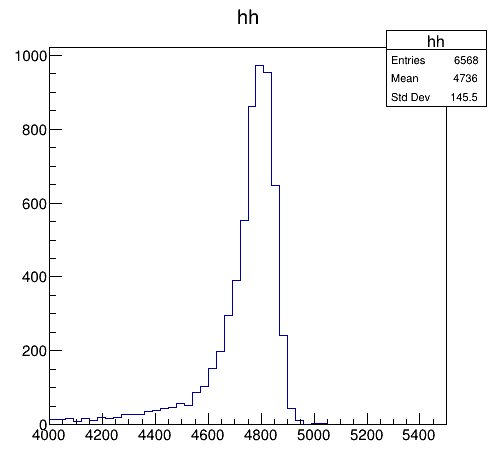

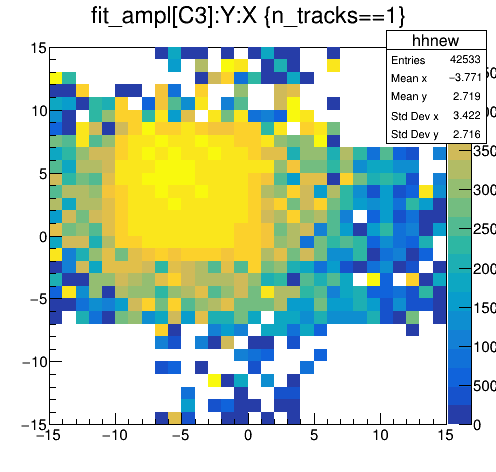

In [32]:
c = ROOT.TCanvas("c","c",500,500)
#tree.Draw("fit_ampl[C3]>>hh(50,0,1000)","n_tracks==1")
hh = ROOT.TH1F("hh","hh",50,4000,5500)
tree.Draw("fit_ampl[C3]>>hh","n_tracks==1 && fabs(X+5.5)<3 && fabs(Y-7.5)<3","")
c.Draw()

c2 = ROOT.TCanvas("c2","c2",500,500)
c2.cd()
tree.Draw("fit_ampl[C3]:Y:X>>hhnew(30,-15,15,30,-15,15,0,10000)","n_tracks==1","PROFCOLZ")
c2.Draw()
htemp = ROOT.gPad.GetPrimitive("hhnew")
xx, yy, zz = ROOT.Long(0), ROOT.Long(0), ROOT.Long(0)
htemp.GetBinXYZ(htemp.GetMaximumBin(), xx,yy,zz);
print xx,yy
print htemp.GetXaxis().GetBinCenter(21)
print htemp.GetYaxis().GetBinCenter(23)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(roohist_fit_test): fit range of variable fit_ampl_test expanded to nearest bin boundaries: [4000,5500] --> [4000,5500]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_test   5.00000e-01  2.50000e-01    0.00000e+00  1.00000e+01
     2 exp_test     7.00000e+00  3.50000e+00    0.00000e+00  1.50000e+02
     3 mean_test    4.70000e+03  1.00000e+02    4.00000e+03  5.00000e+03
     4 sigma_test   6.00000e+01  3.00000e+01    0.00000e+00  5.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2

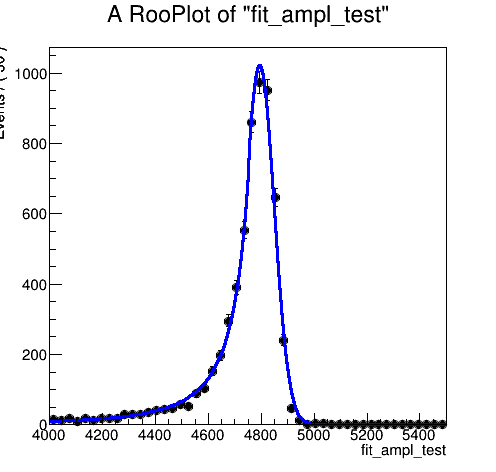

In [33]:
C ='test'
x  = RooRealVar("fit_ampl_%s"%C,"fit_ampl_%s"%C,4000,5500)
roohist = RooDataHist("roohist_fit_%s"%C,"roohist_fit_%s"%C,RooArgList(x),hh)

m  = RooRealVar("mean_%s"%C,"mean_%s"%C,4700,4000,5000)
s  = RooRealVar("sigma_%s"%C,"sigma_%s"%C,60,0,500)
a  = RooRealVar("alpha_%s"%C,"alpha_%s"%C,0.5,0,10)
n  = RooRealVar("exp_%s"%C,"exp_%s"%C,7,0,150)
sig = RooCBShape("signal_%s"%C,"signal_%s"%C,x,m,s,a,n)

res = sig.fitTo(roohist,RooFit.Save())
res.Print()

canvas = ROOT.TCanvas("cfit","cfit",500,500)
frame = x.frame()
roohist.plotOn(frame,RooFit.Name("roohist_test"))
sig.plotOn(frame,RooFit.Name("signal_test"))
frame.Draw()
canvas.Draw()

In [34]:
print 'Reduced chi2 : ',frame.chiSquare("signal_test","roohist_test",4) # 4 = nFitParameters from CB

Reduced chi2 :  3.2397122779


In [7]:
print 'results :'
print 'mean = %.2f'%m.getVal()
print 'sigma = %.2f'%s.getVal()
print 'n = %.2f'%n.getVal()
print 'alpha = %.2f'%a.getVal()

results :
mean = 4796.22
sigma = 53.36
n = 2.67
alpha = 0.67


AttributeError: 'PyROOT_NoneType' object has no attribute 'Draw'

Warning in <TSelectorDraw::Begin>: Deleting old histogram with different dimensions


<ROOT.TH1F object ("hh") at 0x8b64c50>